In [37]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [38]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [39]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [40]:
# Use the citipy module to determine city based on latitude and longitude.

from citipy import citipy

In [41]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

dawson creek ca
saleaula ws
busselton au
provideniya ru
biltine td
cape town za
constitucion cl
bilibino ru
barentsburg sj
mys shmidta ru
cedar city us
hobart au
avarua ck
cabo san lucas mx
broome au
lompoc us
qaanaaq gl
rikitea pf
amderma ru
bariadi tz
hami cn
puerto carreno co
nome us
taolanaro mg
new norfolk au
butaritari ki
meyungs pw
mozarlandia br
caravelas br
antalaha mg
ushuaia ar
albany au
ribeira grande pt
sao filipe cv
vila velha br
tiksi ru
ust-nera ru
grants us
barrow us
roseburg us
tres arroyos ar
tabor cz
pemba mz
catalao br
norman wells ca
albany au
saint george bm
gat ly
busselton au
hermanus za
waipawa nz
vaini to
qaanaaq gl
tasiilaq gl
palau mx
goderich sl
bredasdorp za
inuvik ca
hermanus za
kapaa us
ushuaia ar
upernavik gl
kruisfontein za
pacific grove us
necochea ar
takoradi gh
barentsburg sj
mar del plata ar
atuona pf
ushuaia ar
alofi nu
ambodifototra mg
rikitea pf
agirish ru
albany au
hithadhoo mv
quatre cocos mu
viransehir tr
ratnagiri in
leningradskiy ru
cape t

albany au
avarua ck
kangaatsiaq gl
saint-augustin ca
seoul kr
clyde river ca
airai pw
iqaluit ca
ushuaia ar
rikitea pf
tual id
chernyshevskiy ru
clyde river ca
mataura pf
cabo san lucas mx
hvide sande dk
stornoway gb
bluff nz
bitung id
saint george bm
puerto ayora ec
dikson ru
ancud cl
mayo ca
atuona pf
torbay ca
albany au
jamestown sh
new norfolk au
mataura pf
rikitea pf
cape town za
norman wells ca
yellowknife ca
dikson ru
chuy uy
vestmannaeyjar is
atuona pf
santa cruz cr
busselton au
kaitangata nz
ushuaia ar
chokurdakh ru
tazovskiy ru
kodiak us
vestmannaeyjar is
puerto ayora ec
mahebourg mu
takhatpur in
praya id
castro cl
daru pg
salmas ir
attawapiskat ca
kidal ml
turbat pk
abu dhabi ae
sisimiut gl
namibe ao
albany au
terrace ca
ushuaia ar
terrace ca
tonekabon ir
punta arenas cl
saint-philippe re
abeche td
rikitea pf
san cristobal ec
busselton au
qaanaaq gl
kamenskoye ru
viligili mv
punta arenas cl
ushuaia ar
saint george bm
qaanaaq gl
ginda er
samusu ws
mataura pf
portland au
ugleg

In [42]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [43]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [44]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [45]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [46]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dawson creek
Processing Record 2 of Set 1 | saleaula
City not found. Skipping...
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | provideniya
Processing Record 5 of Set 1 | biltine
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | constitucion
Processing Record 8 of Set 1 | bilibino
Processing Record 9 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 10 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 11 of Set 1 | cedar city
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | cabo san lucas
Processing Record 15 of Set 1 | broome
Processing Record 16 of Set 1 | lompoc
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | amderma
City not found. Skipping...
Processing Record 20 of Set 1 | bariadi
Pro

Processing Record 39 of Set 4 | georgetown
Processing Record 40 of Set 4 | huanta
Processing Record 41 of Set 4 | tessalit
Processing Record 42 of Set 4 | klaksvik
Processing Record 43 of Set 4 | kununurra
Processing Record 44 of Set 4 | hasaki
Processing Record 45 of Set 4 | severo-kurilsk
Processing Record 46 of Set 4 | el guayabito
Processing Record 47 of Set 4 | cabra
Processing Record 48 of Set 4 | clyde river
Processing Record 49 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 50 of Set 4 | santa cruz de tenerife
Processing Record 1 of Set 5 | brenham
Processing Record 2 of Set 5 | gazojak
Processing Record 3 of Set 5 | port-gentil
Processing Record 4 of Set 5 | owensboro
Processing Record 5 of Set 5 | lata
Processing Record 6 of Set 5 | katsuura
Processing Record 7 of Set 5 | adrar
Processing Record 8 of Set 5 | bolungarvik
City not found. Skipping...
Processing Record 9 of Set 5 | rensvik
Processing Record 10 of Set 5 | shangrao
Processing Record 11 of Set 5 |

Processing Record 24 of Set 8 | saint-augustin
Processing Record 25 of Set 8 | iqaluit
Processing Record 26 of Set 8 | tual
Processing Record 27 of Set 8 | chernyshevskiy
Processing Record 28 of Set 8 | hvide sande
Processing Record 29 of Set 8 | stornoway
Processing Record 30 of Set 8 | bitung
Processing Record 31 of Set 8 | mayo
Processing Record 32 of Set 8 | santa cruz
Processing Record 33 of Set 8 | takhatpur
Processing Record 34 of Set 8 | praya
Processing Record 35 of Set 8 | salmas
Processing Record 36 of Set 8 | kidal
Processing Record 37 of Set 8 | turbat
Processing Record 38 of Set 8 | abu dhabi
Processing Record 39 of Set 8 | sisimiut
Processing Record 40 of Set 8 | namibe
Processing Record 41 of Set 8 | terrace
Processing Record 42 of Set 8 | tonekabon
Processing Record 43 of Set 8 | abeche
Processing Record 44 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 45 of Set 8 | viligili
City not found. Skipping...
Processing Record 46 of Set 8 | ginda
Process

Processing Record 15 of Set 12 | haripur
Processing Record 16 of Set 12 | raymond
Processing Record 17 of Set 12 | mwandiga
Processing Record 18 of Set 12 | boddam
Processing Record 19 of Set 12 | caucaia
Processing Record 20 of Set 12 | exeter
Processing Record 21 of Set 12 | sorvag
City not found. Skipping...
Processing Record 22 of Set 12 | horsham
Processing Record 23 of Set 12 | tabas
Processing Record 24 of Set 12 | nicoya
Processing Record 25 of Set 12 | bairiki
Processing Record 26 of Set 12 | shache
Processing Record 27 of Set 12 | halalo
City not found. Skipping...
Processing Record 28 of Set 12 | buka
Processing Record 29 of Set 12 | batasan
Processing Record 30 of Set 12 | port lincoln
Processing Record 31 of Set 12 | teeli
Processing Record 32 of Set 12 | iwanai
Processing Record 33 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 34 of Set 12 | grindavik
Processing Record 35 of Set 12 | fray bentos
Processing Record 36 of Set 12 | senno
Processing Record 

In [47]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dawson Creek,55.7666,-120.2362,1.04,78,1,0.00,CA,2021-12-06 00:22:23
1,Busselton,-33.6500,115.3333,62.04,63,72,17.67,AU,2021-12-06 00:22:23
2,Provideniya,64.3833,-173.3000,28.51,86,90,8.95,RU,2021-12-06 00:18:51
3,Biltine,14.5333,20.9167,74.16,22,4,11.18,TD,2021-12-06 00:22:24
4,Cape Town,-33.9258,18.4232,61.21,88,75,1.01,ZA,2021-12-06 00:21:03
5,Constitucion,-35.3333,-72.4167,58.08,89,8,5.95,CL,2021-12-06 00:20:33
6,Bilibino,68.0546,166.4372,-18.18,99,100,2.66,RU,2021-12-06 00:22:24
7,Cedar City,37.6775,-113.0619,52.77,24,1,8.05,US,2021-12-06 00:22:25
8,Hobart,-42.8794,147.3294,68.25,60,75,3.00,AU,2021-12-06 00:20:17
9,Avarua,-21.2078,-159.7750,82.45,78,20,6.91,CK,2021-12-06 00:20:28


In [48]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [49]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dawson Creek,CA,2021-12-06 00:22:23,55.7666,-120.2362,1.04,78,1,0.00
1,Busselton,AU,2021-12-06 00:22:23,-33.6500,115.3333,62.04,63,72,17.67
2,Provideniya,RU,2021-12-06 00:18:51,64.3833,-173.3000,28.51,86,90,8.95
3,Biltine,TD,2021-12-06 00:22:24,14.5333,20.9167,74.16,22,4,11.18
4,Cape Town,ZA,2021-12-06 00:21:03,-33.9258,18.4232,61.21,88,75,1.01
5,Constitucion,CL,2021-12-06 00:20:33,-35.3333,-72.4167,58.08,89,8,5.95
6,Bilibino,RU,2021-12-06 00:22:24,68.0546,166.4372,-18.18,99,100,2.66
7,Cedar City,US,2021-12-06 00:22:25,37.6775,-113.0619,52.77,24,1,8.05
8,Hobart,AU,2021-12-06 00:20:17,-42.8794,147.3294,68.25,60,75,3.00
9,Avarua,CK,2021-12-06 00:20:28,-21.2078,-159.7750,82.45,78,20,6.91


In [50]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [51]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [52]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'12/05/21'

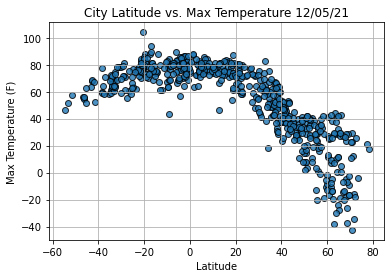

In [53]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

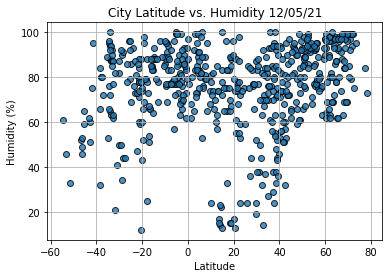

In [59]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

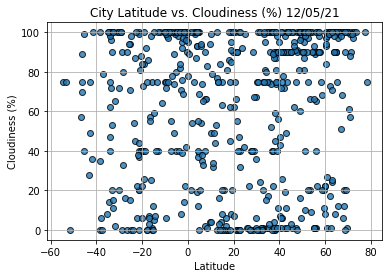

In [60]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

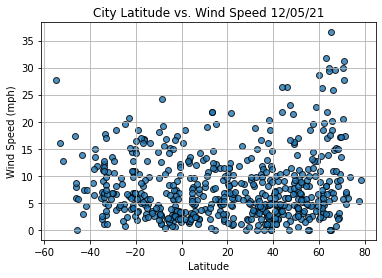

In [61]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [62]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [63]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

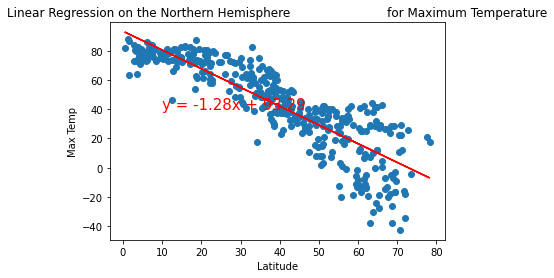

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

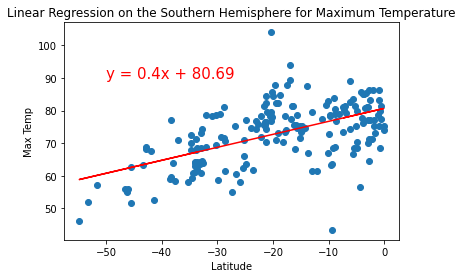

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

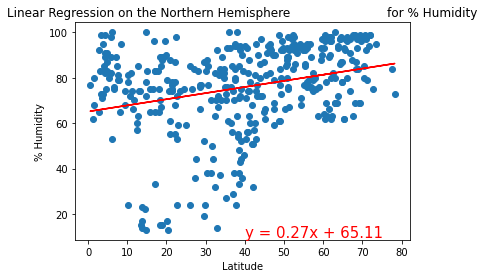

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

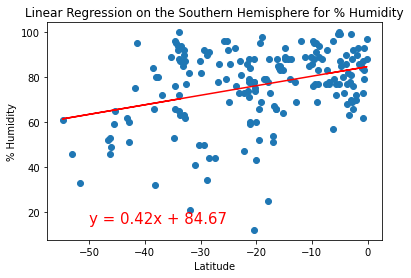

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

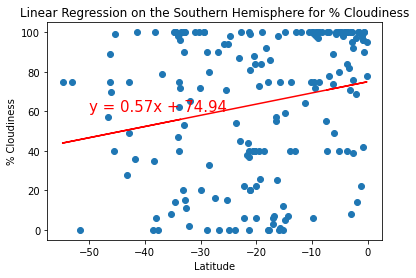

In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

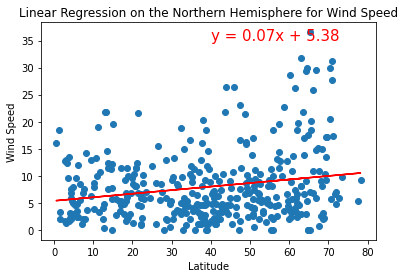

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

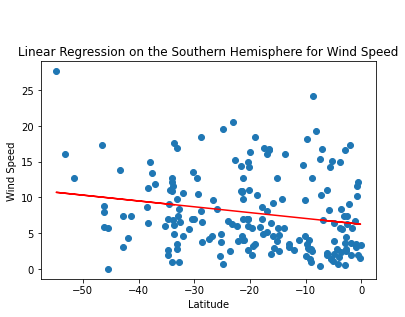

In [74]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))